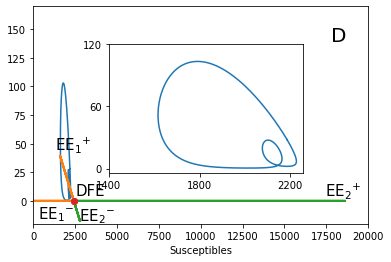

In [5]:
#Figura 5. Dinámicas predichas por el modelo SIRS con tasa de incidencia LHD. 

#Finlandia con forzamiento estacional

from scipy import pi,array,zeros,loadtxt,eye
from scipy import integrate,linalg,optimize,interpolate
from numpy import random,linspace,log,ones,sqrt,arctan
from numpy import nonzero,diff,cos,pi
from pylab import plot,show,grid,ion,ioff,axes,setp
from pylab import title,xlabel,ylabel,subplot,axis,text

def funcionSIRSLHD(y, t, p):
    f = zeros([2])
    betaIS = p[0]*(1.0 + p[1]*cos(2.0*pi*t))*y[0]*y[1]**2/(y[1] + p[2])
    f[0] = xi - xi*y[0] - gamma*y[1] - betaIS
    f[1] = -eta*y[1] + betaIS
    return f

def evaluarLHDConForz(p):
    y0 = array([ 0.87889684,  0.02012139])    
    y0 = integrate.odeint(funcionSIRSLHD,y0,linspace(0,20,2000),args=(p,))[-1,:]
    ySoln = integrate.odeint(funcionSIRSLHD,y0,linspace(0,2,1000),args=(p,))
    return ySoln

N = 2420.0
mu = 0.013
nu = 36.0
gamma = 1.8
xi = gamma + mu
eta = nu + mu
p = array([4.28779903e+01,   2.70760668e-01,   2.43100720e-06])

b0 = p[0]
b1 = p[1]
theta = p[2]
tshow = linspace(0,2,1000)
ySoln = evaluarLHDConForz(p)


r0 = []
i0 = []
s0 = []
i1 = []
s1 = []

for k in range(1000):
    r0k = b0*(1.0 + b1*cos(2.0*pi*tshow[k]))/(nu + mu)
    raiz = sqrt(N**2*(1.0-1.0/r0k)**2-4.0*N*theta*(mu+mu+gamma)/(r0k*(gamma+mu)))
    i0k = (gamma+mu)*(N*(1.0-1.0/r0k)+raiz)/(2*(mu+nu+gamma))
    i0.append(i0k)
    s0k = (i0k+theta)*N/(i0k*r0k)
    s0.append(s0k)
    i1k = (gamma+mu)*(N*(1.0-1.0/r0k)-raiz)/(2*(mu+nu+gamma))
    i1.append(i1k)
    s1k = (i1k+theta)*N/(i1k*r0k)
    s1.append(s1k)
    r0.append(r0k)

r0 = array(r0)
i0 = array(i0)
s0 = array(s0)
i1 = array(i1)
s1 = array(s1)

a = diff(nonzero(r0>1)[0])
b = nonzero((a-1.0))[0]

plot(ySoln[:,0]*N,ySoln[:,1]*N,'-')
plot(s0[:],i0[:],'-',linewidth=2.0)
plot(s1[:],i1[:],'-',linewidth=2.0)

plot(N*ones(2),0.0*ones(2),'o')
axis([0.0,20000.0,-20.0,170.0])
text(1300,45,r"EE$_{1}$$^{+}$",fontsize=15)
text(2750,-17,r"EE$_{2}$$^{-}$",fontsize=15)
text(17400,5,r"EE$_{2}$$^{+}$",fontsize=15)
text(300,-15,r"EE$_{1}$$^{-}$",fontsize=15)
text(2500,5,"DFE",fontsize=15)
text(17800,140, 'D', fontsize=20)
xlabel('Susceptibles')
#ylabel('Infected')
#title('Finland')

aa = axes([0.3, 0.3, 0.45, 0.45])
plot(ySoln[:,0]*N,ySoln[:,1]*N,'-')
setp(aa, xticks=[1400,1800,2200], yticks=[0,60,120])
show()


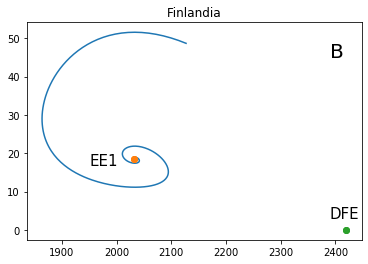

In [2]:
#Finlandia sin forzamiento estacional

from scipy import pi,array,zeros,loadtxt,eye
from scipy import integrate,linalg,optimize,interpolate
from numpy import random,linspace,log,ones,sqrt,arctan
from numpy import nonzero,diff,cos,pi
from pylab import plot,show,grid,ion,ioff,axes,setp
from pylab import title,xlabel,ylabel,subplot,axis,text

def funcionSIRSLHD(y, t, p):
    f = zeros([2])
    betaIS = p[0]*(1.0 + p[1]*cos(2.0*pi*t))*y[0]*y[1]**2/(y[1] + p[2])
    f[0] = xi - xi*y[0] - gamma*y[1] - betaIS
    f[1] = -eta*y[1] + betaIS
    return f

def evaluarLHDSinForz(p):
    y0 = array([0.87889684,  0.02012139])    
    ySoln = integrate.odeint(funcionSIRSLHD,y0,linspace(0.0,50.0,5000),args=(p,))
    return ySoln

N = 2420.0
mu = 0.013
nu = 36.0
gamma = 1.8
xi = gamma + mu
eta = nu + mu
p = array([4.28779903e+01, 0.0, 2.43100720e-06])          

b0 = p[0]
b1 = p[1]
theta = p[2]
tshow = linspace(0.0,50.0,5000)
ySoln = evaluarLHDSinForz(p)


r0 = []
i0 = []
s0 = []
i1 = []
s1 = []

for k in range(5000):
    r0k = b0*(1.0 + b1*cos(2.0*pi*tshow[k]))/(nu + mu)
    raiz = sqrt(N**2*(1.0-1.0/r0k)**2-4.0*N*theta*(mu+mu+gamma)/(r0k*(gamma+mu)))
    i0k = (gamma+mu)*(N*(1.0-1.0/r0k)+raiz)/(2*(mu+nu+gamma))
    i0.append(i0k)
    s0k = (i0k+theta)*N/(i0k*r0k)
    s0.append(s0k)
    i1k = (gamma+mu)*(N*(1.0-1.0/r0k)-raiz)/(2*(mu+nu+gamma))
    i1.append(i1k)
    s1k = (i1k+theta)*N/(i1k*r0k)
    s1.append(s1k)
    r0.append(r0k)

r0 = array(r0)
i0 = array(i0)
s0 = array(s0)
i1 = array(i1)
s1 = array(s1)

plot(ySoln[:,0]*N,ySoln[:,1]*N,'-')
plot(s0[0]*ones(2),i0[0]*ones(2),'o')
plot(N*ones(2),0.0*ones(2),'o')
text(1950,17,r"EE1",fontsize=15)
text(2390,3,"DFE",fontsize=15)
text(2390,45, 'B', fontsize=20)
#xlabel('Susceptible')
#ylabel('Infected')
title('Finlandia')
show()


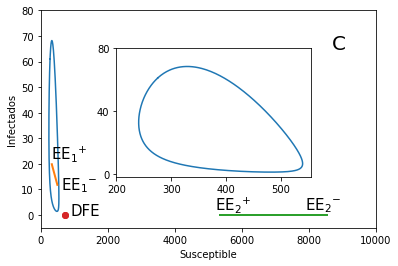

In [3]:
#Gambia con forzamiento estacional

from scipy import pi,array,zeros,loadtxt,eye
from scipy import integrate,linalg,optimize,interpolate
from numpy import random,linspace,log,ones,sqrt,arctan
from numpy import nonzero,diff,cos,pi
from pylab import plot,show,grid,ion,ioff,axes,setp,subplot,axis,text
from pylab import xlabel,ylabel,title

def funcionSIRSLHD(y, t, p):
    f = zeros([2])
    betaIS = p[0]*(1.0 + p[1]*cos(2*pi*t))*y[0]*y[1]**2/(y[1] + p[2])
    f[0] = xi - xi*y[0] - gamma*y[1] - betaIS
    f[1] = -eta*y[1] + betaIS
    return f

def evaluarLHDConForz(p):
    y0 = array([0.28186748,  0.05120061])
    y0 = integrate.odeint(funcionSIRSLHD,y0,linspace(0,20,2000),args=(p,))[-1,:]
    ySoln = integrate.odeint(funcionSIRSLHD,y0,linspace(0,1,1000),args=(p,))
    return ySoln

N = 736.0
mu = 0.041
nu = 36.0
gamma = 1.8
xi = gamma + mu
eta = nu + mu

p = array([6.73037598e+01,   2.02129920e-01,   1.00000000e-09])          
data = loadtxt('gambia.txt')

b0 = p[0]
b1 = p[1]
tshow = linspace(0,1,1000)
ySoln = evaluarLHDConForz(p)
theta = p[2]

r0 = []
i0 = []
s0 = []
i1 = []
s1 = []

for k in range(1000):
    r0k = b0*(1.0 + b1*cos(2.0*pi*tshow[k]))/(nu + mu)
    raiz = sqrt(N**2*(1.0-1.0/r0k)**2-4.0*N*theta*(mu+mu+gamma)/(r0k*(gamma+mu)))
    i0k = (gamma+mu)*(N*(1.0-1.0/r0k)+raiz)/(2*(mu+nu+gamma))
    i0.append(i0k)
    s0k = (i0k+theta)*N/(i0k*r0k)
    s0.append(s0k)
    i1k = (gamma+mu)*(N*(1.0-1.0/r0k)-raiz)/(2*(mu+nu+gamma))
    i1.append(i1k)
    s1k = (i1k+theta)*N/(i1k*r0k)
    s1.append(s1k)
    r0.append(r0k)
    
r0 = array(r0)
i0 = array(i0)
s0 = array(s0)
i1 = array(i1)
s1 = array(s1)
                                                                     
a = diff(nonzero(r0>1)[0])
b = nonzero((a-1.0))[0]

plot(ySoln[:,0]*N,ySoln[:,1]*N,'-')
plot(s0[0:500],i0[0:500],'-',linewidth=2.0)
plot(s1[0:500],i1[0:500],'-',linewidth=2.0)

plot(N*ones(2),0.0*ones(2),'o')
axis([0.0,10000.0,-5.0,80.0])
text(300,22,r"EE$_{1}$$^{+}$",fontsize=15)
text(600,10,r"EE$_{1}$$^{-}$",fontsize=15)
text(5200,2,r"EE$_{2}$$^{+}$",fontsize=15)
text(7900,2,r"EE$_{2}$$^{-}$",fontsize=15)
text(900,0,"DFE",fontsize=15)
text(8700,65, 'C', fontsize=20)
xlabel('Susceptible')
ylabel('Infectados')
#title('Gambia')

aa = axes([0.3, 0.3, 0.45, 0.45])
plot(ySoln[:,0]*N,ySoln[:,1]*N,'-')
setp(aa, xticks=[200,300,400,500], yticks=[0,40,80])
show()

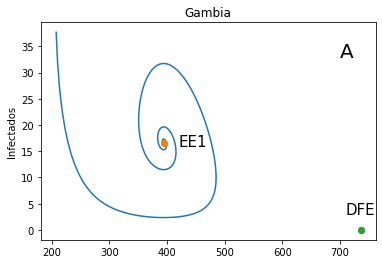

In [4]:
#Finlandia sin forzamiento estacional

from scipy import pi,array,zeros,loadtxt,eye
from scipy import integrate,linalg,optimize,interpolate
from numpy import random,linspace,log,ones,sqrt,arctan
from numpy import nonzero,diff,cos,pi
from pylab import plot,show,grid,ion,ioff,axes,setp,subplot,axis,text
from pylab import xlabel,ylabel,title

def funcionSIRSLHD(y, t, p):
    f = zeros([2])
    betaIS = p[0]*(1.0 + p[1]*cos(2*pi*t))*y[0]*y[1]**2/(y[1] + p[2])
    f[0] = xi - xi*y[0] - gamma*y[1] - betaIS
    f[1] = -eta*y[1] + betaIS
    return f

def evaluarLHDSinForz(p):
    y0 = array([0.28186748,  0.05120061])
    ySoln = integrate.odeint(funcionSIRSLHD,y0,linspace(0.0,50.0,5000),args=(p,))
    return ySoln

N = 736.0
mu = 0.041
nu = 36.0
gamma = 1.8
xi = gamma + mu
eta = nu + mu
p = array([6.73037598e+01,   0.0,   1.00000000e-09])          

b0 = p[0]
b1 = p[1]
tshow = linspace(0.0,50.0,5000)
ySoln = evaluarLHDSinForz(p)
theta = p[2]

r0 = []
i0 = []
s0 = []
i1 = []
s1 = []

for k in range(5000):
    r0k = b0*(1.0 + b1*cos(2.0*pi*tshow[k]))/(nu + mu)
    raiz = sqrt(N**2*(1.0-1.0/r0k)**2-4.0*N*theta*(mu+mu+gamma)/(r0k*(gamma+mu)))
    i0k = (gamma+mu)*(N*(1.0-1.0/r0k)+raiz)/(2*(mu+nu+gamma))
    i0.append(i0k)
    s0k = (i0k+theta)*N/(i0k*r0k)
    s0.append(s0k)
    i1k = (gamma+mu)*(N*(1.0-1.0/r0k)-raiz)/(2*(mu+nu+gamma))
    i1.append(i1k)
    s1k = (i1k+theta)*N/(i1k*r0k)
    s1.append(s1k)
    r0.append(r0k)
    
r0 = array(r0)
i0 = array(i0)
s0 = array(s0)
i1 = array(i1)
s1 = array(s1)
                                                                     
plot(ySoln[:,0]*N,ySoln[:,1]*N,'-')
plot(s0[0]*ones(2),i0[0]*ones(2),'o')
plot(N*ones(2),0.0*ones(2),'o')
text(420,16,"EE1",fontsize=15)
text(710,3,"DFE",fontsize=15)
text(700,33, 'A', fontsize=20)
#xlabel('Susceptibles')
ylabel('Infectados')
title('Gambia')
show()
